In [77]:
#dataset
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as npmpl
import matplotlib as mpl
import matplotlib.pyplot as plt


In [78]:
# code bit from https://gist.github.com/srishtis/10d8e8cecfa128ff694bd8846f825135
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines


In [79]:
type(iris_df)

pandas.core.frame.DataFrame

In [80]:
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:title={'center':'Distribution of sepal length by Iris species with pandas (default colors)'}, xlabel='sepal_len'>

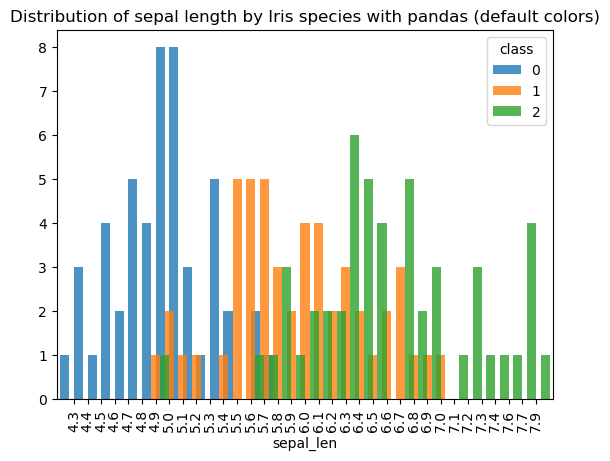

In [94]:
iris_df.groupby('class')['sepal_len'].value_counts().unstack(0).plot(kind='bar',width=2,alpha=0.8,title='Distribution of sepal length by Iris species with pandas (default colors)')


<AxesSubplot:title={'center':'Distribution of sepal length by Iris species in pandas, with Matplotlib colormap "tab20b"'}, xlabel='sepal_len'>

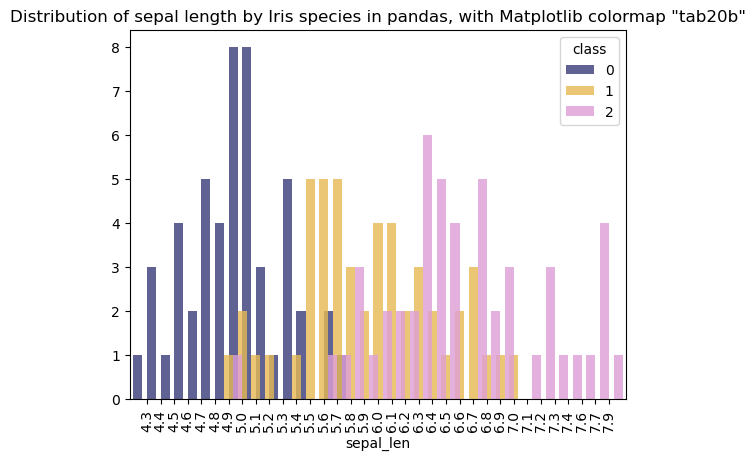

In [88]:
iris_df.groupby('class')['sepal_len'].value_counts().unstack(0).plot(kind='bar',colormap='tab20b',width=2,alpha=0.8, title='Distribution of sepal length by Iris species in pandas, with Matplotlib colormap "tab20b"')

[Text(0.5, 1.0, 'Petal length against sepal length in Seaborn, by Iris species, \n using "tab20b" colormap from Matplotlib')]

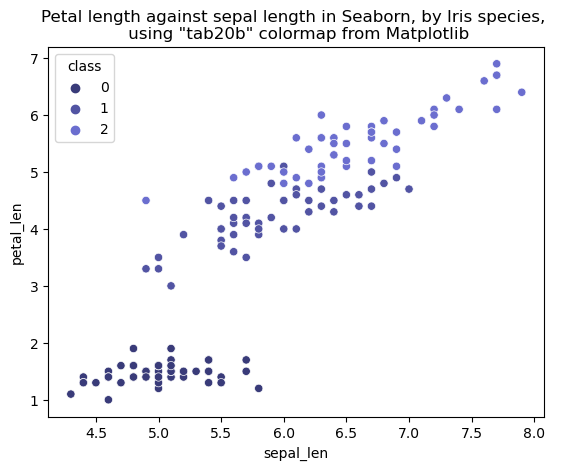

In [97]:
sns.scatterplot(data=iris_df, x='sepal_len',y='petal_len',hue='class',palette='tab20b').set(title='Petal length against sepal length in Seaborn, by Iris species, \n using "tab20b" colormap from Matplotlib')

In [ ]:
#make a distribution plot by class with seaborn
sns.displot(data=iris_df, x='sepal_len',hue='class',palette='tab20b',bins=35)

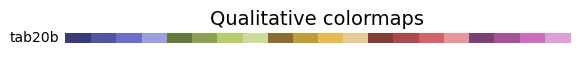

In [98]:
#from https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
plot_color_gradients('Qualitative',
                     [ 'tab20b'])

In [99]:
cmap = mpl.cm.get_cmap("tab20b")
rgba = cmap(0)
print(rgba) 

(0.2235294117647059, 0.23137254901960785, 0.4745098039215686, 1.0)


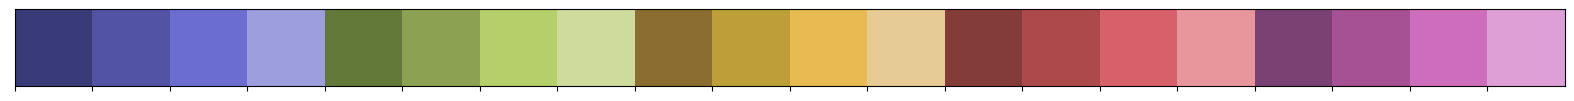

In [100]:
sns.palplot(sns.color_palette("tab20b", 20))



In [101]:
palette_tab20b = sns.color_palette("tab20b", 20)

palette = sns.color_palette([palette_tab20b[0],palette_tab20b[10],palette_tab20b[19]])
palette

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

[Text(0.5, 1.0, 'Petal length against sepal length in Seaborn, by Iris species, \n using "tab20b" colormap from Matplotlib')]

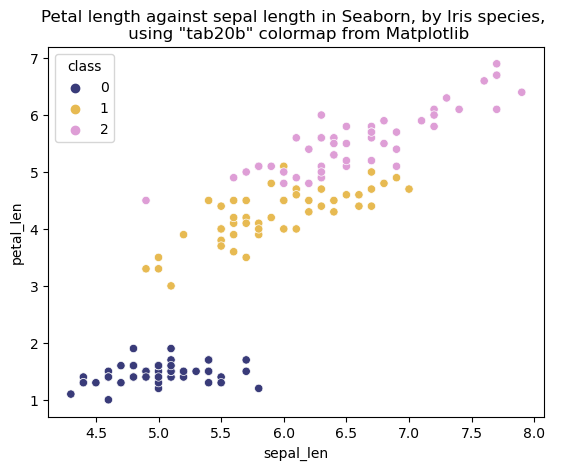

In [102]:
sns.scatterplot(data=iris_df, x='sepal_len',y='petal_len',hue='class',palette=palette).set(title='Petal length against sepal length in Seaborn, by Iris species, \n using "tab20b" colormap from Matplotlib')